In [58]:
# import all necessary libraries
import torch
# print(torch.__version__)
from torchvision import models
from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt
import os

In [59]:
# load the 10 images and store them in a list
cat_image_list = []
directory = "cat_images/"
for i in range(10):
    filename = "cat" + str(i) + ".jpg"
    filepath = os.path.join(directory, filename)
    try:
        img = Image.open(filepath)
        cat_image_list.append(img)
    except:
        print("Could not load image at path:", filepath)
# print(cat_image_list)
# print(len(cat_image_list))


In [60]:
preprocess = transforms.Compose([
transforms.Resize(256),
transforms.CenterCrop(224),
transforms.ToTensor(),
transforms.Normalize(
mean=[0.485, 0.456, 0.406],
std=[0.229, 0.224, 0.225]
)])
batch_t_list = []
for img in cat_image_list:
    img_t = preprocess(img)
    batch_t= torch.unsqueeze(img_t, 0)
    batch_t_list.append(batch_t)

In [61]:
# load the pretrained NN
resnet = models.resnet101(pretrained=True)
alexnet = models.alexnet(pretrained=True)


In [62]:
# classification with ResNet
resnet_catbreeds = []
resnet_percentages = []
for batch_t in batch_t_list:
    resnet.eval()
    out = resnet(batch_t)
    with open('imagenet_classes.txt') as f:
        labels = [line.strip() for line in f.readlines()]
    _, index = torch.max(out, 1)
    percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
    # give the best possible outcome
    best_result = labels[index[0]], percentage[index[0]].item()
    # give all possible outcomes
    _, indices = torch.sort(out, descending=True)
    result = [(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]
    print(result[0])
    resnet_catbreeds.append(result[0][0])
    resnet_percentages.append(round(result[0][1],4))
# print(resnet_catbreeds)
# print(resnet_percentages)

('tiger cat', 50.530517578125)
('Egyptian cat', 74.79900360107422)
('tiger cat', 40.05523681640625)
('Egyptian cat', 38.57571792602539)
('tabby, tabby cat', 38.65382766723633)
('Persian cat', 99.57861328125)
('Egyptian cat', 56.63349533081055)
('tabby, tabby cat', 67.60675048828125)
('Egyptian cat', 45.6140251159668)
('Egyptian cat', 52.784912109375)


In [63]:
# classification with AlexNet
alexnet_catbreeds = []
alexnet_percentages = []
for batch_t in batch_t_list:
    alexnet.eval()
    out = alexnet(batch_t)
    with open('imagenet_classes.txt') as f:
        labels = [line.strip() for line in f.readlines()]
    _, index = torch.max(out, 1)
    percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
    # give the best possible outcome
    best_result = labels[index[0]], percentage[index[0]].item()
    # give all possible outcomes
    _, indices = torch.sort(out, descending=True)
    result = [(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]
    print(result[0])
    alexnet_catbreeds.append(result[0][0])
    alexnet_percentages.append(round(result[0][1],4))
print(alexnet_catbreeds)
print(alexnet_percentages)

('langur', 27.081928253173828)
('Egyptian cat', 29.428117752075195)
('tabby, tabby cat', 61.025108337402344)
('Egyptian cat', 73.76952362060547)
('tabby, tabby cat', 48.400604248046875)
('Persian cat', 97.10498046875)
('red fox, Vulpes vulpes', 34.62782287597656)
('tabby, tabby cat', 47.198707580566406)
('tiger cat', 56.714202880859375)
('Egyptian cat', 36.70499038696289)
['langur', 'Egyptian cat', 'tabby, tabby cat', 'Egyptian cat', 'tabby, tabby cat', 'Persian cat', 'red fox, Vulpes vulpes', 'tabby, tabby cat', 'tiger cat', 'Egyptian cat']
[27.0819, 29.4281, 61.0251, 73.7695, 48.4006, 97.105, 34.6278, 47.1987, 56.7142, 36.705]


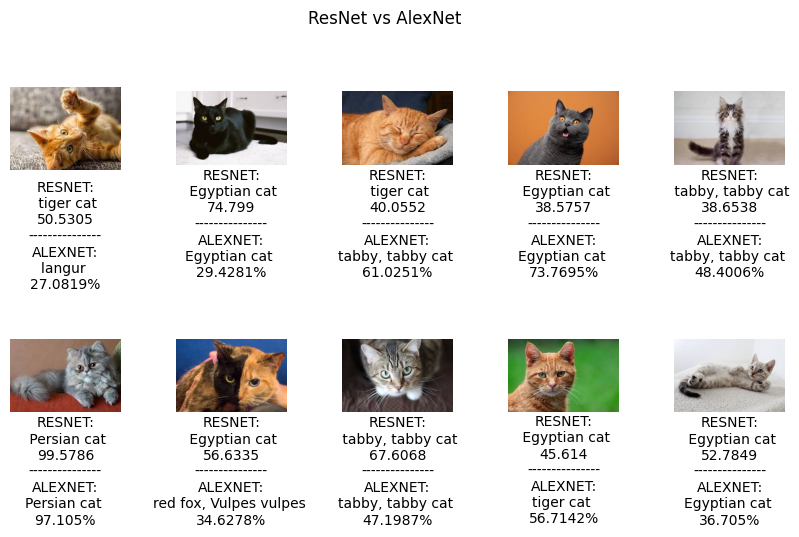

In [64]:
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
fig.subplots_adjust(hspace=0.8, wspace=0.5)
fig.suptitle("ResNet vs AlexNet")

for i, ax in enumerate(axes.flat):
    if i < len(cat_image_list):
        ax.imshow(cat_image_list[i])
        ax.text(0.5, -0.8, ("RESNET:\n {}\n{}\n---------------\nALEXNET:\n{} \n{}%".format(resnet_catbreeds[i], resnet_percentages[i], alexnet_catbreeds[i], alexnet_percentages[i])), transform=ax.transAxes,
                    horizontalalignment='center', verticalalignment='center')
    ax.axis('off')

plt.show()